In [ ]:
# Perform rebalancing of the positive/negative class on the dataset using SMOTE for oversampling and
# RandomUnderSampler for undersampling

In [1]:
import pandas as pd
dfp = pd.read_csv('../data/positive_pre_rebalancing.csv')
dfn = pd.read_csv('../data/negative_pre_rebalancing.csv')

In [2]:
df = dfp.append(dfn)

In [3]:
df = df.replace({'Positive': 0, 'Negative': 1})

In [4]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df.tokens_text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [5]:
X = pd.DataFrame(X.toarray(),columns=words)
y = pd.DataFrame(df['Sentiment'])

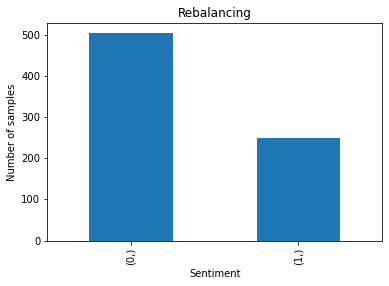

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
y.value_counts()
plt.title('Rebalancing')
plt.xlabel('Class')
plt.ylabel('Number of samples')
my_xticks = ['Positive','Negative']
y.value_counts().plot(kind='bar')
plt.show()

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter = Counter(y)
over = SMOTE(sampling_strategy='all')
under = RandomUnderSampler(sampling_strategy='all')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
counter = Counter(y)

Counter({'Sentiment': 1})
Counter({'Sentiment': 1})


In [9]:
y = y.reset_index()
y = y['Sentiment']

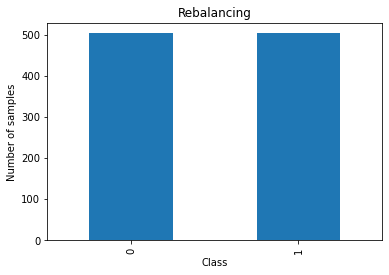

In [10]:
import matplotlib.pyplot as plt
y.value_counts()
plt.title('Rebalancing')
plt.xlabel('Class')
plt.ylabel('Number of samples')
y.value_counts().plot(kind='bar')
plt.show()

In [12]:
X['Sentiment'] = y

/var/folders/ng/6ydpsldn459bzvmkjf1xndz40000gn/T/ipykernel_17312/133554708.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sentiment'] = y


In [135]:
X.to_csv("../data/dataset_rebalanced.csv",index=False)